In [3]:
# import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler, robust_scale
plt.rcParams.update({'font.size': 22})
import tool

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# 以月分做分群

In [2]:
# import the dataset
dataset = tool.read_ele_csv(r'D:\JunShen\dataset\彰化_雲林用電量(專用電表_day_raw.csv')

讀取用電資料: D:\JunShen\dataset\彰化_雲林用電量(專用電表_day_raw.csv
讀取 500 筆資料之花費時間: 0.4 分鐘
讀取 1000 筆資料之花費時間: 0.79 分鐘
讀取 1500 筆資料之花費時間: 1.22 分鐘
讀取 2000 筆資料之花費時間: 1.64 分鐘
讀取 2500 筆資料之花費時間: 2.05 分鐘
讀取 3000 筆資料之花費時間: 2.46 分鐘
讀取 3500 筆資料之花費時間: 2.87 分鐘
讀取 4000 筆資料之花費時間: 3.29 分鐘
讀取 4500 筆資料之花費時間: 3.5 分鐘
Stop iteration!
串接資料花費時間: 3.5 分鐘
用電資料讀取完成!!


In [5]:
dataset.head()

,date,98666103.0,98666100.0,98666041.0,98666040.0,98666039.0,98665900.0,98662811.0,98662670.0,98662660.0,...,37224371.0,73307016.0,34244800.0,92214745.0,98187652.0,34648560.0,53296412.0,68106009.0,65012233.0,39820017.0
0,2007-01-01,0.274194,0.370968,0.0,1.016129,0.0,10.983871,3.177419,0.274194,0.83871,...,0.0,4.516129,0.0,0.758065,0.0,0.0,0.346774,0.048387,11.677419,0.0
1,2007-01-02,0.274194,0.370968,0.0,1.016129,0.0,10.983871,3.177419,0.274194,0.83871,...,0.0,4.516129,0.0,0.758065,0.0,0.0,0.346774,0.048387,11.677419,0.0
2,2007-01-03,0.274194,0.370968,0.0,1.016129,0.0,10.983871,3.177419,0.274194,0.83871,...,0.0,4.516129,0.0,0.758065,0.0,0.0,0.346774,0.048387,11.677419,0.0
3,2007-01-04,0.274194,0.370968,0.0,1.016129,0.0,10.983871,3.177419,0.274194,0.83871,...,0.0,4.516129,0.0,0.758065,0.0,0.0,0.346774,0.048387,11.677419,0.0
4,2007-01-05,0.274194,0.370968,0.0,1.016129,0.0,10.983871,3.177419,0.274194,0.83871,...,0.0,4.516129,0.0,0.758065,0.0,0.0,0.346774,0.048387,11.677419,0.0


In [6]:
dataset.describe()

,98666103.0,98666100.0,98666041.0,98666040.0,98666039.0,98665900.0,98662811.0,98662670.0,98662660.0,98662657.0,...,37224371.0,73307016.0,34244800.0,92214745.0,98187652.0,34648560.0,53296412.0,68106009.0,65012233.0,39820017.0
count,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,...,4169.000000,4169.000000,4199.000000,4199.000000,4169.000000,4199.000000,4199.000000,4199.000000,4199.000000,4169.000000
mean,0.733032,0.462015,0.580376,1.239343,0.545130,14.481543,1.751369,0.320553,0.624196,2.375327,...,0.084673,2.551571,0.278876,1.484401,1.070521,2.248035,1.321148,3.501667,3.304834,0.264932
std,0.424054,0.217103,0.444356,0.978480,0.763146,9.691686,1.461396,0.176163,0.587361,0.907608,...,0.188866,1.218346,0.544716,1.335351,0.907157,2.023754,0.917243,3.819536,4.816163,0.284963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.209677,0.000000,0.000000,0.000000,0.774194,...,0.000000,0.225806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.467742,0.306452,0.083333,0.533333,0.000000,9.193548,0.483871,0.193548,0.145161,1.645161,...,0.000000,1.790323,0.000000,0.658333,0.258065,0.024194,0.677419,1.185484,0.000000,0.024194
50%,0.716667,0.451613,0.645161,0.983871,0.000000,13.225806,1.532258,0.290323,0.532258,2.338710,...,0.000000,2.450000,0.000000,1.072581,0.903226,2.032258,0.975806,2.283333,0.000000,0.183333
75%,1.032258,0.633333,0.903226,1.716667,1.050000,19.983871,2.866667,0.416667,0.903226,3.112903,...,0.041667,3.350000,0.357143,1.681034,1.580645,3.709677,1.958333,4.677419,5.483871,0.395161
max,2.017857,1.048387,1.583333,4.783333,2.650000,46.050000,5.096774,0.833333,2.451613,4.133333,...,1.125000,5.857143,2.825000,6.041667,3.586207,8.916667,5.104839,20.158333,24.166667,1.283333


In [3]:
dataset.date = dataset.date.astype(np.datetime64)

In [4]:
dataset['year'] = dataset.date.dt.year
dataset['month'] = dataset.date.dt.month

In [5]:
X = dataset.groupby(['year','month']).sum().values

In [6]:
# feature Scaling

sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [7]:
y = dataset.year.astype(str).str.cat(dataset.month.astype(str), join='left', sep='-').unique()

In [8]:
# import the SOM model
matrix_size = 10
# init the model
som = MiniSom( x = matrix_size, y = matrix_size, input_len = 165525 , sigma = 1.0, learning_rate = 0.5)
# init the weight
som.random_weights_init(X)
# traing the model
som.train_random(data = X, num_iteration = 500)

In [9]:
w, h = matrix_size, matrix_size
Matrix = [[[] for x in range(w)] for y in range(h)] 
for i, x in enumerate(X):
    w = som.winner(x)
    # plt.text(w[0], w[1], y[i], fontsize=12)
    Matrix[w[0]][w[1]].append(y[i])
    
# sort by weigth
weight_matrix = [[0 for x in range(matrix_size)] for y in range(matrix_size)]
for i in range(matrix_size):
    for j in range(matrix_size):
        weight_matrix[i][j] = som._weights[i][j].mean()
weight_matrix = np.array(weight_matrix)

In [18]:
def showEleUsage(matrix):
    data_by_month = [0 for x in range(len(y))]
    index_by_som = []
    tmp_x = dataset.groupby(['year','month']).sum().values
    for i in matrix:
        for w in i:
            index_by_som_tmp = []
            for k in w:
                index_by_som_tmp.append(np.where(y == k)[0][0])
                data_by_month[np.where(y == k)[0][0]] = tmp_x.mean(axis=1)[np.where(y == k)[0][0]]
            index_by_som.append(index_by_som_tmp)

    td_empty = np.zeros((len(y),matrix_size*matrix_size))
    plt_df = pd.DataFrame(td_empty)
    for m in range(len(index_by_som)):
        for i in index_by_som[m]:
            plt_df.iloc[i,m] = data_by_month[i]
    
    fig,ax = plt.subplots(figsize = (20,16))
    # barlist = plt.bar(y, data_by_month)
    # plt.xticks(y)
    plt.xticks(np.arange(0, len(y)+1, 5))
    plt.xlabel('date')
    plt.ylabel('ele_usage_mean')
    plt.title('ele_usage_group')
    fig.autofmt_xdate(rotation=-90)

    # 分群
    g1 = []
    g2 = []
    for i, v in enumerate(np.sort(weight_matrix.flatten())): # 小到大
        if i >= (matrix_size**2)/2:
            pos_in = 0
            pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
            while (pos in g2):
                pos_in += 1
                pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
            g2.append(pos)    
        else:
            pos_in = 0
            pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
            while (pos in g1):
                pos_in += 1
                pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
            g1.append(pos)
    
    plt.bar(y, plt_df.iloc[:,g1].sum(axis=1).values, label=str(1))
    plt.bar(y, plt_df.iloc[:,g2].sum(axis=1).values, label=str(2))

    # set color by neuron
    # colormap = plt.cm.nipy_spectral(np.linspace(0,1,matrix_size*matrix_size)) #I suggest to use nipy_spectral, Set1,Paired
    # for m in range(len(index_by_som)):
    #     plt.bar(y, plt_df.iloc[:,m].values, label=str(m))

    fig.tight_layout()
    plt.legend()
    plt.show()

    return plt_df

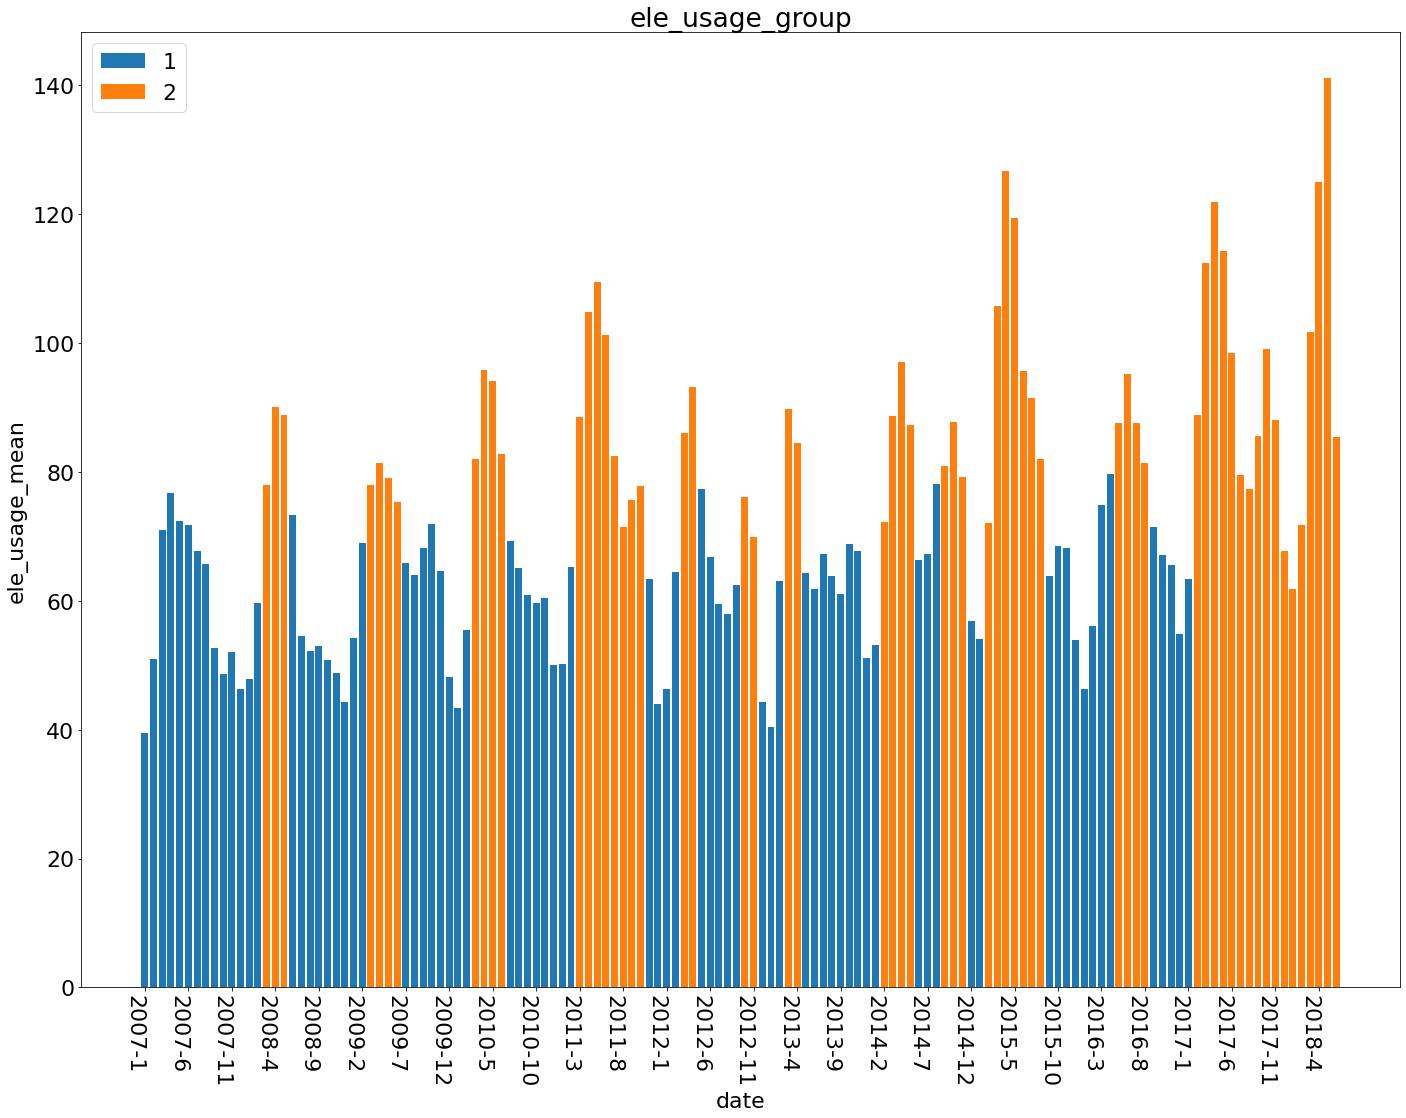

In [10]:
data_by_month = [0 for x in range(len(y))]
index_by_som = []
tmp_x = dataset.groupby(['year','month']).sum().values
for i in Matrix:
    for w in i:
        index_by_som_tmp = []
        for k in w:
            index_by_som_tmp.append(np.where(y == k)[0][0])
            data_by_month[np.where(y == k)[0][0]] = tmp_x.mean(axis=1)[np.where(y == k)[0][0]]
        index_by_som.append(index_by_som_tmp)

td_empty = np.zeros((len(y),matrix_size*matrix_size))
plt_df = pd.DataFrame(td_empty)
for m in range(len(index_by_som)):
    for i in index_by_som[m]:
        plt_df.iloc[i,m] = data_by_month[i]

fig,ax = plt.subplots(figsize = (20,16))
# barlist = plt.bar(y, data_by_month)
# plt.xticks(y)
plt.xticks(np.arange(0, len(y)+1, 5))
plt.xlabel('date')
plt.ylabel('ele_usage_mean')
plt.title('ele_usage_group')
fig.autofmt_xdate(rotation=-90)

# 分群
g1 = []
g2 = []
for i, v in enumerate(np.sort(weight_matrix.flatten())): # 小到大
    if i >= (matrix_size**2)/2:
        pos_in = 0
        pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
        while (pos in g2):
            pos_in += 1
            pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
        g2.append(pos)    
    else:
        pos_in = 0
        pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
        while (pos in g1):
            pos_in += 1
            pos = np.where(weight_matrix.flatten()==v)[0][pos_in]
        g1.append(pos)

plt.bar(y, plt_df.iloc[:,g1].sum(axis=1).values, label=str(1))
plt.bar(y, plt_df.iloc[:,g2].sum(axis=1).values, label=str(2))

# set color by neuron
# colormap = plt.cm.nipy_spectral(np.linspace(0,1,matrix_size*matrix_size)) #I suggest to use nipy_spectral, Set1,Paired
# for m in range(len(index_by_som)):
#     plt.bar(y, plt_df.iloc[:,m].values, label=str(m))

fig.tight_layout()
plt.legend()
plt.show()

In [11]:
df_month_out = pd.DataFrame()
df_month_out['month'] = y

In [12]:
for i, v in enumerate(plt_df.iloc[:,g1].sum(axis=1).values):
    if v > 0: 
        df_month_out.loc[i,'cluster'] = 1
for i, v in enumerate(plt_df.iloc[:,g2].sum(axis=1).values):
    if v > 0: 
        df_month_out.loc[i,'cluster'] = 2

In [14]:
df_month_out.to_csv(r'D:\JunShen\dataset\dataAfterProcess\somFeature\month_cluster_by_ele.csv')

# 以地理分布做分群
- 距離
- 方向
- ele性質

In [277]:
df_out = {}

In [278]:
dataset_position = pd.read_csv(r'D:\JunShen\dataset\彰化_雲林用電量(專用電表_以處理重複電表_已前處理.csv', encoding='big5', index_col=0)
dataset_position.修正電號 = dataset_position.修正電號.astype(np.int32)

In [279]:
dataset_position.head()

,gov,WELL_NO,TOWN,LON,LAT,TWD97_X,TWD97_Y,MEASURE_EQIP,修正電號,9601,...,10612,10701,10702,10703,10704,10705,10706,volt,Unnamed: 0.1,mean
0,雲林縣政府,1.023965e+13,二崙鄉,120.424471,23.757680,191335.0,2628306.0,有(專用電表),98666103,8.5,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,NaN,NaN,22.304348
1,雲林縣政府,1.023965e+13,二崙鄉,120.424709,23.757211,191359.0,2628254.0,有(專用電表),98666100,11.5,...,20.0,20.0,20.0,27.5,27.5,20.0,20.0,NaN,NaN,14.057971
2,雲林縣政府,1.023965e+13,二崙鄉,120.427908,23.754776,191684.0,2627983.0,有(專用電表),98666041,0.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,NaN,NaN,17.659420
3,雲林縣政府,1.023965e+13,二崙鄉,120.428054,23.754984,191699.0,2628006.0,有(專用電表),98666040,31.5,...,20.0,20.0,20.0,30.5,30.5,51.5,51.5,NaN,NaN,37.710145
4,雲林縣政府,1.033965e+13,二崙鄉,120.428191,23.755048,191713.0,2628013.0,有(專用電表),98666039,0.0,...,20.0,20.0,20.0,79.5,79.5,66.0,66.0,NaN,NaN,16.586957


In [280]:
token = 'pk.eyJ1IjoidG9ueTg4MDEwOTU1IiwiYSI6ImNsNDN4MHNjdTA4dmgzbW1uOGU5bXpxb3MifQ.6v3Xll4pflqg9a90WQtX4w' # you will need your own token

In [281]:
def plot_position(df, cluster):
    fig = go.Figure()
    if cluster>0:
        for c in range(1,cluster+1):
            df_c = df.loc[df.cluster_num == c,:]
            fig.add_trace(go.Scattermapbox(lat=df_c['LAT'],
                lon=df_c['LON'],
                mode='markers+text',
                marker={'size':10},
                # textfont=dict(size=10, color='black'),
                # textposition='top right',
                name=f'cluster: {c}'))
    else:
        fig.add_trace(go.Scattermapbox(lat=df['LAT'],
                lon=df['LON'],
                mode='markers+text',
                marker={'size':10},
                text=df['修正電號'],
                textfont=dict(size=10, color='black'),
                textposition='top right',name=''))

    fig.update_layout(mapbox_style="dark", mapbox_accesstoken=token)
    fig.update_layout(
    mapbox = { 
        'center': { 'lon': 120.424471, 'lat': 23.758381},
        'zoom': 8
            },
    margin = {'l':0, 'r':0, 'b':0, 't':30})

    fig.show()

In [282]:
well_x = 191998.186
well_y = 2627561.41599999
def selectEle(well_x,well_y,df):
    condition = np.sqrt((df["TWD97_X"]-well_x)**2 + (df["TWD97_Y"]-well_y)**2) < 5000 # 5km
    return df.loc[condition,:]

In [283]:
df_5km = selectEle(well_x,well_y,dataset_position)

In [284]:
df_5km = df_5km.reset_index(drop=True)

In [285]:
for i in range(len(df_5km)):
    df_5km.loc[i,'mean'] = df_5km.loc[i,'9601':'10706'].mean()
    df_5km.loc[i,'sum'] = df_5km.loc[i,'9601':'10706'].sum()

## 性質

In [286]:
X = df_5km.loc[:,"9601":"10706"].values
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)
X[np.isnan(X)] = 0

In [287]:
df_5km.head()

,gov,WELL_NO,TOWN,LON,LAT,TWD97_X,TWD97_Y,MEASURE_EQIP,修正電號,9601,...,10701,10702,10703,10704,10705,10706,volt,Unnamed: 0.1,mean,sum
0,雲林縣政府,1.023965e+13,二崙鄉,120.424471,23.757680,191335.0,2628306.0,有(專用電表),98666103,8.5,...,20.0,20.0,20.0,20.0,20.0,20.0,NaN,NaN,22.304348,3078.0
1,雲林縣政府,1.023965e+13,二崙鄉,120.424709,23.757211,191359.0,2628254.0,有(專用電表),98666100,11.5,...,20.0,20.0,27.5,27.5,20.0,20.0,NaN,NaN,14.057971,1940.0
2,雲林縣政府,1.023965e+13,二崙鄉,120.427908,23.754776,191684.0,2627983.0,有(專用電表),98666041,0.0,...,20.0,20.0,20.0,20.0,20.0,20.0,NaN,NaN,17.659420,2437.0
3,雲林縣政府,1.023965e+13,二崙鄉,120.428054,23.754984,191699.0,2628006.0,有(專用電表),98666040,31.5,...,20.0,20.0,30.5,30.5,51.5,51.5,NaN,NaN,37.710145,5204.0
4,雲林縣政府,1.033965e+13,二崙鄉,120.428191,23.755048,191713.0,2628013.0,有(專用電表),98666039,0.0,...,20.0,20.0,79.5,79.5,66.0,66.0,NaN,NaN,16.586957,2289.0


In [288]:
# import the SOM model
matrix_size = 3
# init the model
som = MiniSom( x = matrix_size, y = matrix_size, input_len = 138 , sigma = 1.0, learning_rate = 0.5, random_seed=42)
# init the weight
som.random_weights_init(X)
# traing the model
som.train_random(data = X, num_iteration = 1000)

In [289]:
y = df_5km.修正電號.values

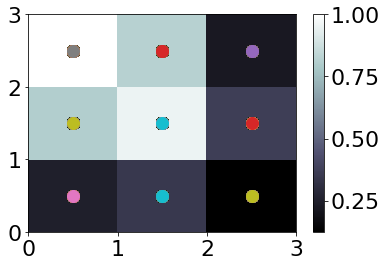

In [290]:
# making a self organization map
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
# plot(0.5,0.5,'o')
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5,'o', markersize=12)
show()
w, h = matrix_size, matrix_size
Matrix = [[[] for x in range(w)] for y in range(h)] 
for i, x in enumerate(X):
    w = som.winner(x)
    # plt.text(w[0], w[1], y[i], fontsize=12)
    Matrix[w[0]][w[1]].append(y[i])
    
# sort by weigth
weight_matrix = [[0 for x in range(matrix_size)] for y in range(matrix_size)]
for i in range(matrix_size):
    for j in range(matrix_size):
        weight_matrix[i][j] = som._weights[i][j].mean()
weight_matrix = np.array(weight_matrix)

In [291]:
count_list = []
c = 0
for i in range(matrix_size):
    for j in range(matrix_size):
        c += 1
        count_list.append(len(Matrix[i][j]))
        print(len(Matrix[i][j]), c)
        for ele in Matrix[i][j]:
            df_5km.loc[df_5km.修正電號==ele,'cluster_num'] = c

1490 1
874 2
368 3
2292 4
632 5
392 6
2442 7
1151 8
1378 9


In [292]:
for c in range(1,matrix_size**2+1,1):
    df_out[f"5km_total_chara_cluster{c}"] = df_5km.loc[df_5km.cluster_num == c,"修正電號"].values

In [293]:
df_5km.groupby(['cluster_num']).mean().loc[:,['mean','sum']]

,mean,sum
cluster_num,,
1.0,84.105192,11544.502013
2.0,142.677042,19568.873188
3.0,403.965883,55489.159647
4.0,38.103663,5232.347622
5.0,62.834020,8635.470860
6.0,144.012444,19743.710459
7.0,15.882518,2178.674106
8.0,30.982197,4245.688966
9.0,61.350999,8427.084603


In [294]:
plot_position(df_5km, 16)

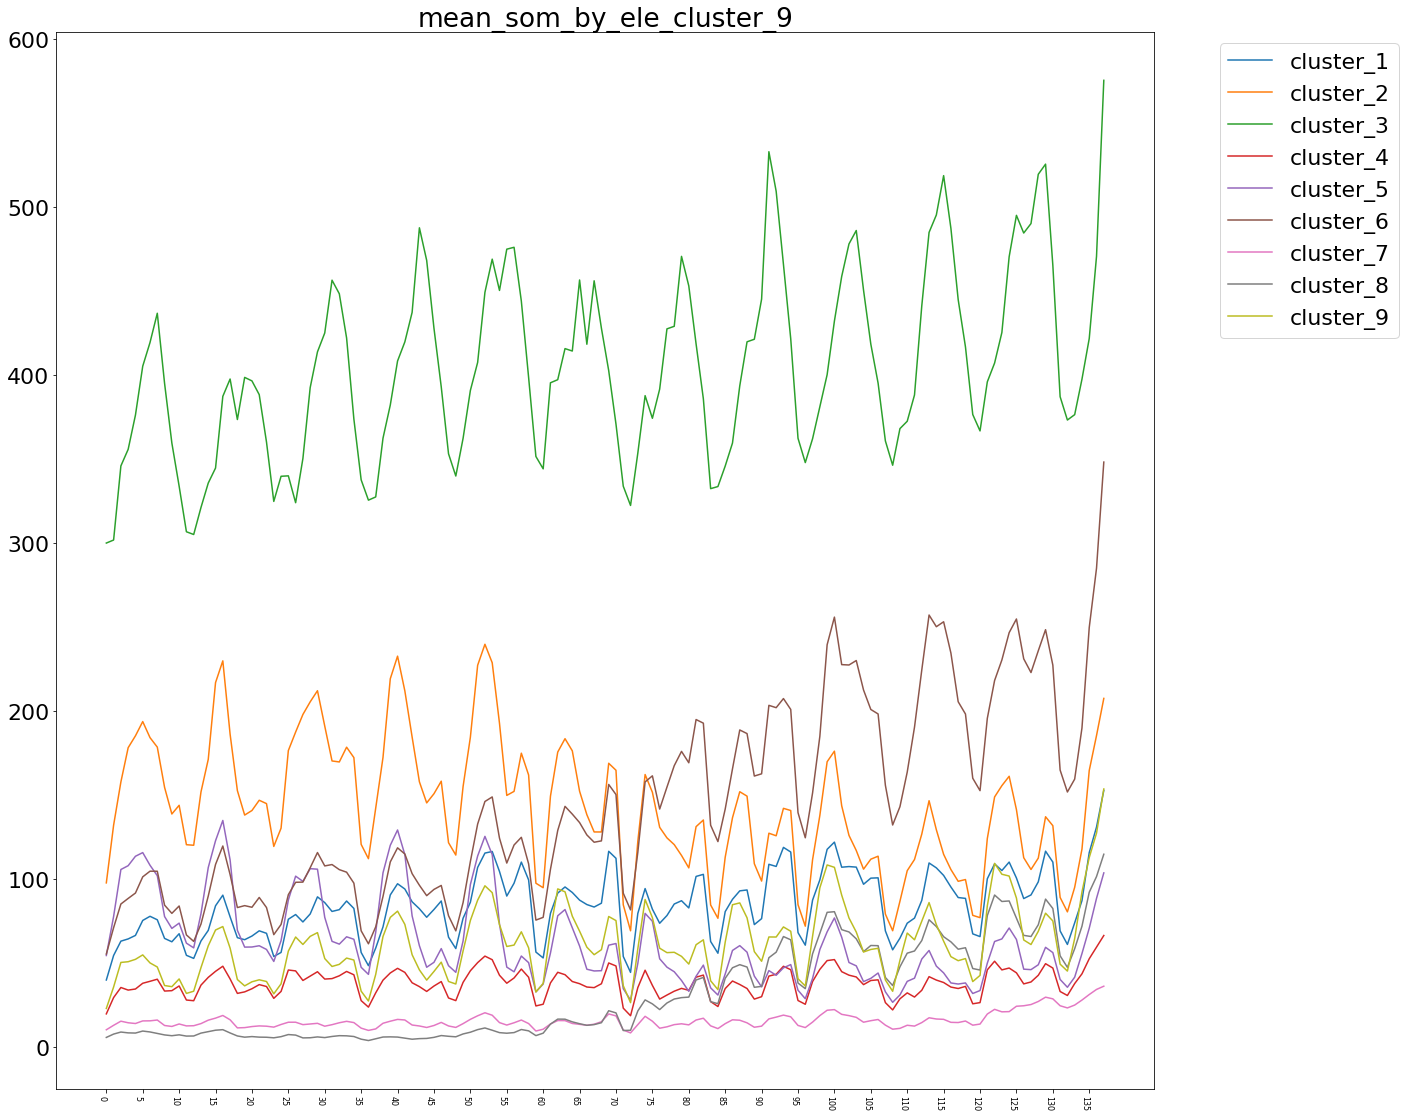

In [295]:
fig = plt.figure(figsize=(20,16))
for i in range(matrix_size**2):
    plt.plot(np.arange(0, 138, 1), df_5km.groupby(['cluster_num']).mean().loc[:,"9601":"10706"].iloc[i,:].values, label=f'cluster_{i+1}')
plt.xticks(fontsize=8)
plt.xticks(np.arange(0, 138+1, 5))
title = f'mean_som_by_ele_cluster_{matrix_size**2}'
plt.title(title)
fig.autofmt_xdate(rotation=-90)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig(r'D:\JunShen\dataset\dataAfterProcess\somFeature\Jiulong(3)\line chart'+'\\'+title)

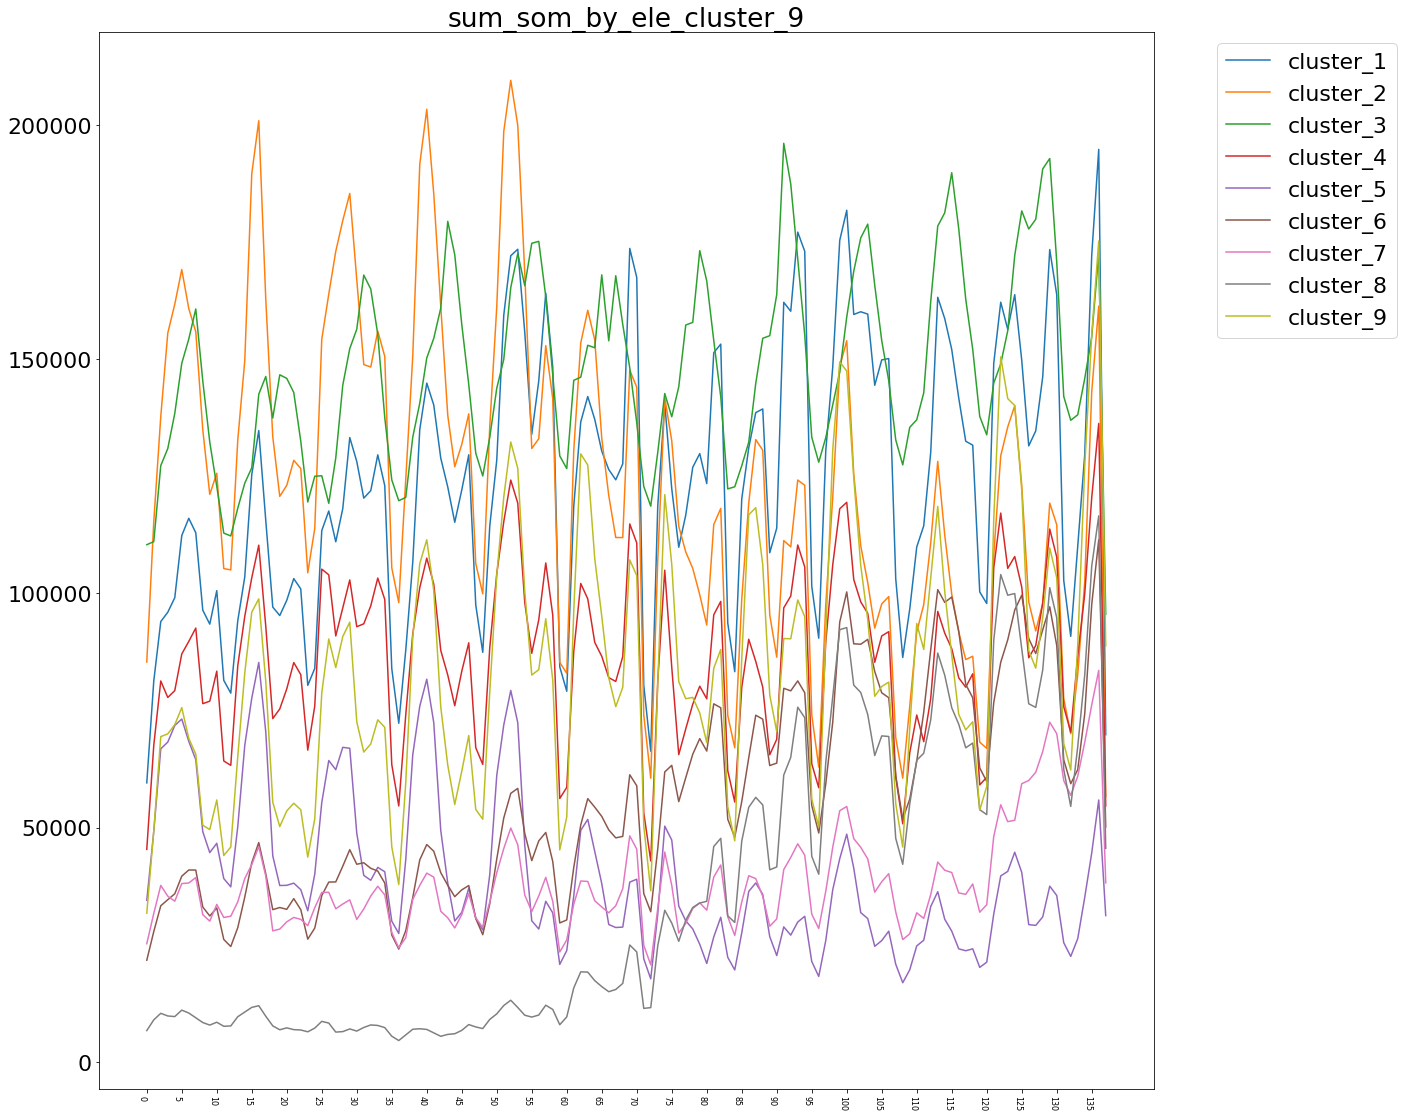

In [296]:
fig = plt.figure(figsize=(20,16))
for i in range(matrix_size**2):
    plt.plot(np.arange(0, 138, 1), df_5km.groupby(['cluster_num']).sum().loc[:,"9601":"10706"].iloc[i,:].values, label=f'cluster_{i+1}')
plt.xticks(fontsize=8)
plt.xticks(np.arange(0, 138+1, 5))
title = f'sum_som_by_ele_cluster_{matrix_size**2}'
plt.title(title)
fig.autofmt_xdate(rotation=-90)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig(r'D:\JunShen\dataset\dataAfterProcess\somFeature\Jiulong(3)\line chart'+'\\'+title)

In [297]:
df_pos_info_cluster = pd.DataFrame(columns={"cluster","mean","sum","count"})
df_pos_info_cluster['cluster'] = range(1,matrix_size**2+1,1)
df_pos_info_cluster = df_pos_info_cluster.set_index('cluster')
df_pos_info_cluster['mean'] = df_5km.groupby(['cluster_num']).mean().loc[:,"mean"]
df_pos_info_cluster['sum'] = df_5km.groupby(['cluster_num']).mean().loc[:,"sum"].round(3)
df_pos_info_cluster['count'] = count_list

In [298]:
df_pos_info_cluster

,sum,count,mean
cluster,,,
1,11544.502,1490,84.105192
2,19568.873,874,142.677042
3,55489.160,368,403.965883
4,5232.348,2292,38.103663
5,8635.471,632,62.834020
6,19743.710,392,144.012444
7,2178.674,2442,15.882518
8,4245.689,1151,30.982197
9,8427.085,1378,61.350999


In [299]:
del df_5km['cluster_num']

## 方向

In [300]:
def addDistanceFeature(well_x,well_y,df):
    df['LENGTH'] = np.sqrt(np.square(well_x-df["TWD97_X"]) + np.square(well_y-df["TWD97_Y"]))
    df['DIRECTION'] = np.arctan2(well_y-df["TWD97_Y"], well_x-df["TWD97_X"])
    # test
    # ix = df[df.DIRECTION<0].index
    # df.loc[ix, "DIRECTION"] += np.pi
    df['COS'] = np.cos(df['DIRECTION'])
    df['SIN'] = np.sin(df['DIRECTION'])

    return df

In [301]:
df_5km_dir = addDistanceFeature(well_x,well_y,df_5km)

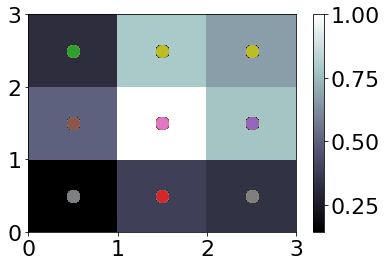

269 1
410 2
631 3
421 4
317 5
698 6
3667 7
1453 8
3153 9
total:11019


In [302]:
# X = df_5km_dir.loc[:,["TWD97_X","TWD97_Y","LENGTH"]].values
X = df_5km_dir.loc[:,["DIRECTION","SIN","COS"]].values

sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)
X[np.isnan(X)] = 0
# import the SOM model
# matrix_size = 4
# init the model
som = MiniSom( x = matrix_size, y = matrix_size, input_len = 3 , sigma = 1.0, learning_rate = 0.5, random_seed=42)
# init the weight
som.random_weights_init(X)
# traing the model
som.train_random(data = X, num_iteration = 1000)
y = df_5km_dir.修正電號.values
# making a self organization map
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
# plot(0.5,0.5,'o')
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5,'o', markersize=12)
show()
w, h = matrix_size, matrix_size
Matrix = [[[] for x in range(w)] for y in range(h)] 
for i, x in enumerate(X):
    w = som.winner(x)
    # plt.text(w[0], w[1], y[i], fontsize=12)
    Matrix[w[0]][w[1]].append(y[i])
    
# sort by weigth
weight_matrix = [[0 for x in range(matrix_size)] for y in range(matrix_size)]
for i in range(matrix_size):
    for j in range(matrix_size):
        weight_matrix[i][j] = som._weights[i][j].mean()
weight_matrix = np.array(weight_matrix)
count_list = []
c = 0
total_num = 0
for i in range(matrix_size):
    for j in range(matrix_size):
        c += 1
        count_list.append(len(Matrix[i][j]))
        print(len(Matrix[i][j]), c)
        total_num += len(Matrix[i][j])
        for ele in Matrix[i][j]:
            df_5km_dir.loc[df_5km_dir.修正電號==ele,'cluster_num'] = c
print('total:' + str(total_num))

In [303]:
for c in range(1,matrix_size**2+1,1):
    df_out[f"5km_total_dir_cluster{c}"] = df_5km_dir.loc[df_5km_dir.cluster_num == c,"修正電號"].values

In [304]:
df_5km_dir.groupby(['cluster_num']).mean().loc[:,["DIRECTION","SIN","COS"]]

,DIRECTION,SIN,COS
cluster_num,,,
1.0,-0.192774,-0.191474,0.980929
2.0,-0.499824,-0.478196,0.875701
3.0,-0.775610,-0.696922,0.710738
4.0,-0.046306,-0.046242,0.997844
5.0,-0.318968,-0.313361,0.948876
6.0,-1.138988,-0.903272,0.416235
7.0,1.362401,0.708124,0.135173
8.0,2.810490,0.320616,-0.932522
9.0,-2.168903,-0.697951,-0.501555


In [305]:
plot_position(df_5km_dir, matrix_size**2)

In [306]:
df_5km_dir.groupby(['cluster_num']).mean().loc[:,"9601":"10706"].loc[:,:]

,9601,9602,9603,9604,9605,9606,9607,9608,9609,9610,...,10609,10610,10611,10612,10701,10702,10703,10704,10705,10706
cluster_num,,,,,,,,,,,,,,,,,,,,,
1.0,24.009294,31.099442,40.435874,40.002788,42.478625,46.810409,50.835502,45.263011,33.049257,32.973978,...,57.251859,64.108736,52.436803,45.200743,47.701673,49.313197,62.190520,72.307621,76.491636,75.021242
2.0,42.349633,65.110432,70.032804,63.753056,65.030562,63.888346,68.514874,80.122453,73.643847,67.488386,...,101.516175,106.835995,98.664619,64.025452,61.228654,86.244676,94.604627,99.134930,100.773137,97.583333
3.0,37.117989,52.005291,53.917196,53.912434,54.780291,56.430820,58.885185,64.600265,60.250661,56.375529,...,73.112916,81.057316,74.243133,44.384971,43.276017,70.514395,75.244982,80.417459,85.145668,91.076531
4.0,40.460214,45.887569,56.822842,59.165083,53.468527,54.476049,66.677949,65.483967,47.845606,48.585709,...,69.427751,74.352138,57.975000,49.903175,46.816865,49.380159,64.446230,78.928770,85.888294,85.016014
5.0,37.386698,52.714774,58.883544,55.754206,54.733701,60.043113,64.293901,68.786540,60.381178,55.719769,...,78.344374,84.538381,74.716614,47.371977,47.030494,70.086751,79.093060,81.886172,86.733964,81.555328
6.0,25.847541,42.673949,42.700931,40.412846,38.780086,43.408906,44.136461,44.916547,43.659742,45.051098,...,66.763290,76.717792,72.883860,46.084171,46.084890,65.233813,68.782734,77.829856,78.202038,100.220307
7.0,38.045455,47.386295,70.653767,76.032487,79.335722,80.062039,73.015561,69.643598,53.213554,49.193762,...,79.495652,90.326687,84.777383,66.306451,56.107120,58.916302,83.173201,106.895942,128.415301,132.986297
8.0,47.064681,58.761995,67.396522,75.535124,84.417872,91.467631,90.455636,76.388831,57.502124,53.846304,...,87.377701,101.915977,96.658793,71.706379,63.152471,71.281976,84.151819,116.524747,145.889522,159.964374
9.0,37.677308,47.535552,49.362135,47.176117,47.469954,57.999126,60.688029,66.589501,63.717466,59.457063,...,88.851870,100.305096,95.135904,62.844969,62.080789,71.024995,75.165421,91.156489,93.284457,125.960170


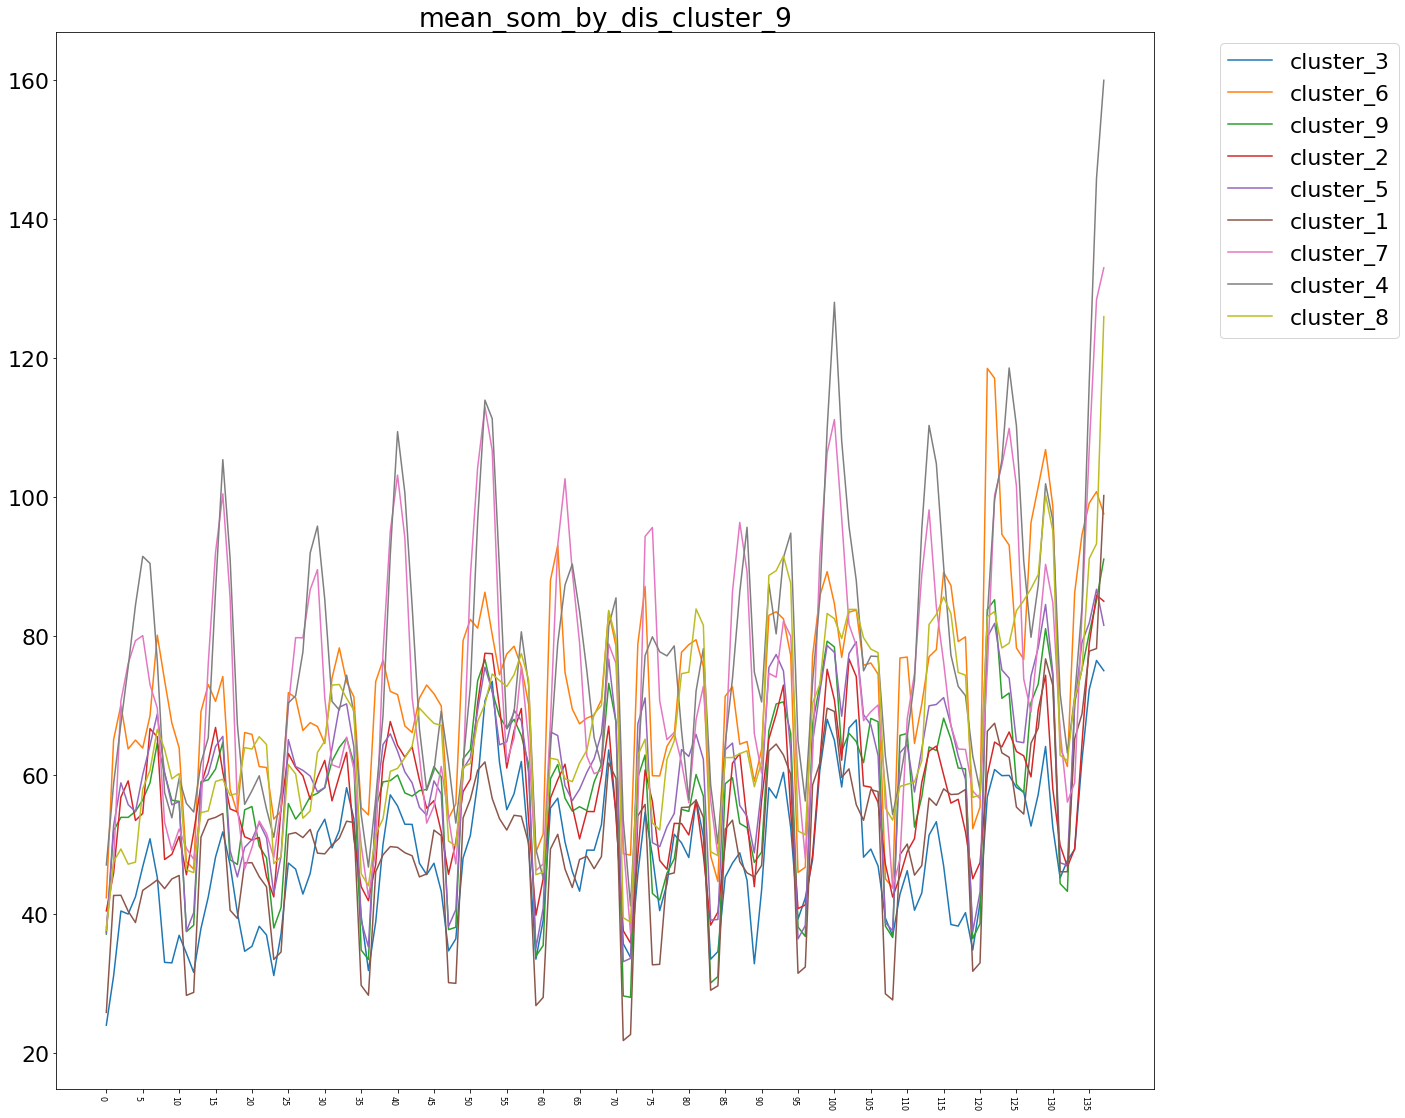

In [307]:
fig = plt.figure(figsize=(20,16))
for i in range(len(df_5km_dir.cluster_num.unique())):
    plt.plot(np.arange(0, 138, 1), df_5km_dir.groupby(['cluster_num']).mean().loc[:,"9601":"10706"].iloc[i,:].values, label=f'cluster_{int(df_5km_dir.cluster_num.unique()[i])}')

plt.xticks(fontsize=8)
plt.xticks(np.arange(0, 138+1, 5))
title = f'mean_som_by_dis_cluster_{matrix_size**2}'
plt.title(title)
fig.autofmt_xdate(rotation=-90)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig(r'D:\JunShen\dataset\dataAfterProcess\somFeature\Jiulong(3)\line chart'+'\\'+title)

In [308]:
del df_5km_dir['cluster_num']

## 距離+性質

In [309]:
def som_distance(df_5km_dir):
    # X = df_5km_dir.loc[:,["TWD97_X","TWD97_Y","LENGTH"]].values
    # df_tmp = df_5km_dir.loc[:,"9601":"10706"]
    df_tmp = pd.DataFrame(df_5km_dir.loc[:,"LENGTH"])
    df_tmp["length1"] = df_5km_dir.loc[:,"LENGTH"]
    X = df_tmp.values

    sc = MinMaxScaler(feature_range = (0,1))
    X = sc.fit_transform(X)
    X[np.isnan(X)] = 0
    # import the SOM model
    # matrix_size = 5
    # init the model
    som = MiniSom( x = matrix_size, y = matrix_size, input_len = 2 , sigma = 1.0, learning_rate = 0.5, random_seed=42)
    # init the weight
    som.random_weights_init(X)
    # traing the model
    som.train_random(data = X, num_iteration = 1000)
    y = df_5km_dir.修正電號.values
    # making a self organization map
    from pylab import bone, pcolor, colorbar, plot, show
    bone()
    pcolor(som.distance_map().T)
    colorbar()
    # plot(0.5,0.5,'o')
    for i, x in enumerate(X):
        w = som.winner(x)
        plot(w[0]+0.5, w[1]+0.5,'o', markersize=12)
    show()
    w, h = matrix_size, matrix_size
    Matrix = [[[] for x in range(w)] for y in range(h)] 
    for i, x in enumerate(X):
        w = som.winner(x)
        # plt.text(w[0], w[1], y[i], fontsize=12)
        Matrix[w[0]][w[1]].append(y[i])
        
    # sort by weigth
    weight_matrix = [[0 for x in range(matrix_size)] for y in range(matrix_size)]
    for i in range(matrix_size):
        for j in range(matrix_size):
            weight_matrix[i][j] = som._weights[i][j].mean()
    weight_matrix = np.array(weight_matrix)
    count_list = []
    c = 0
    for i in range(matrix_size):
        for j in range(matrix_size):
            c += 1
            count_list.append(len(Matrix[i][j]))
            print(len(Matrix[i][j]), c)
            for ele in Matrix[i][j]:
                df_5km_dir.loc[df_5km_dir.修正電號==ele,'cluster_num'] = c
    
    return df_5km_dir

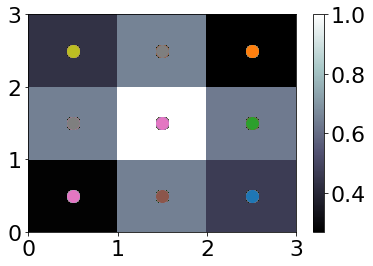

499 1
1033 2
6817 3
435 4
363 5
671 6
397 7
472 8
332 9


In [310]:
df_5km_dis = som_distance(df_5km_dir)

In [311]:
for c in range(1,matrix_size**2+1,1):
    df_out[f"5km_total_dis_cluster{c}"] = df_5km_dis.loc[df_5km_dis.cluster_num == c,"修正電號"].values

In [312]:
plot_position(df_5km_dis, matrix_size**2)

In [313]:
df_5km_dis.groupby(['cluster_num']).mean().loc[:,["mean","sum","LENGTH"]]

,mean,sum,LENGTH
cluster_num,,,
1.0,58.729617,8065.021543,2307.894662
2.0,64.342443,8815.123346,2979.970458
3.0,70.196190,9636.182791,4163.625023
4.0,64.355630,8836.470690,1582.013681
5.0,50.419964,6927.587466,2074.053134
6.0,62.540512,8573.446349,2604.725863
7.0,64.578076,8879.843829,634.678562
8.0,71.543424,9829.025424,1227.047889
9.0,57.812397,7944.439006,1846.133300


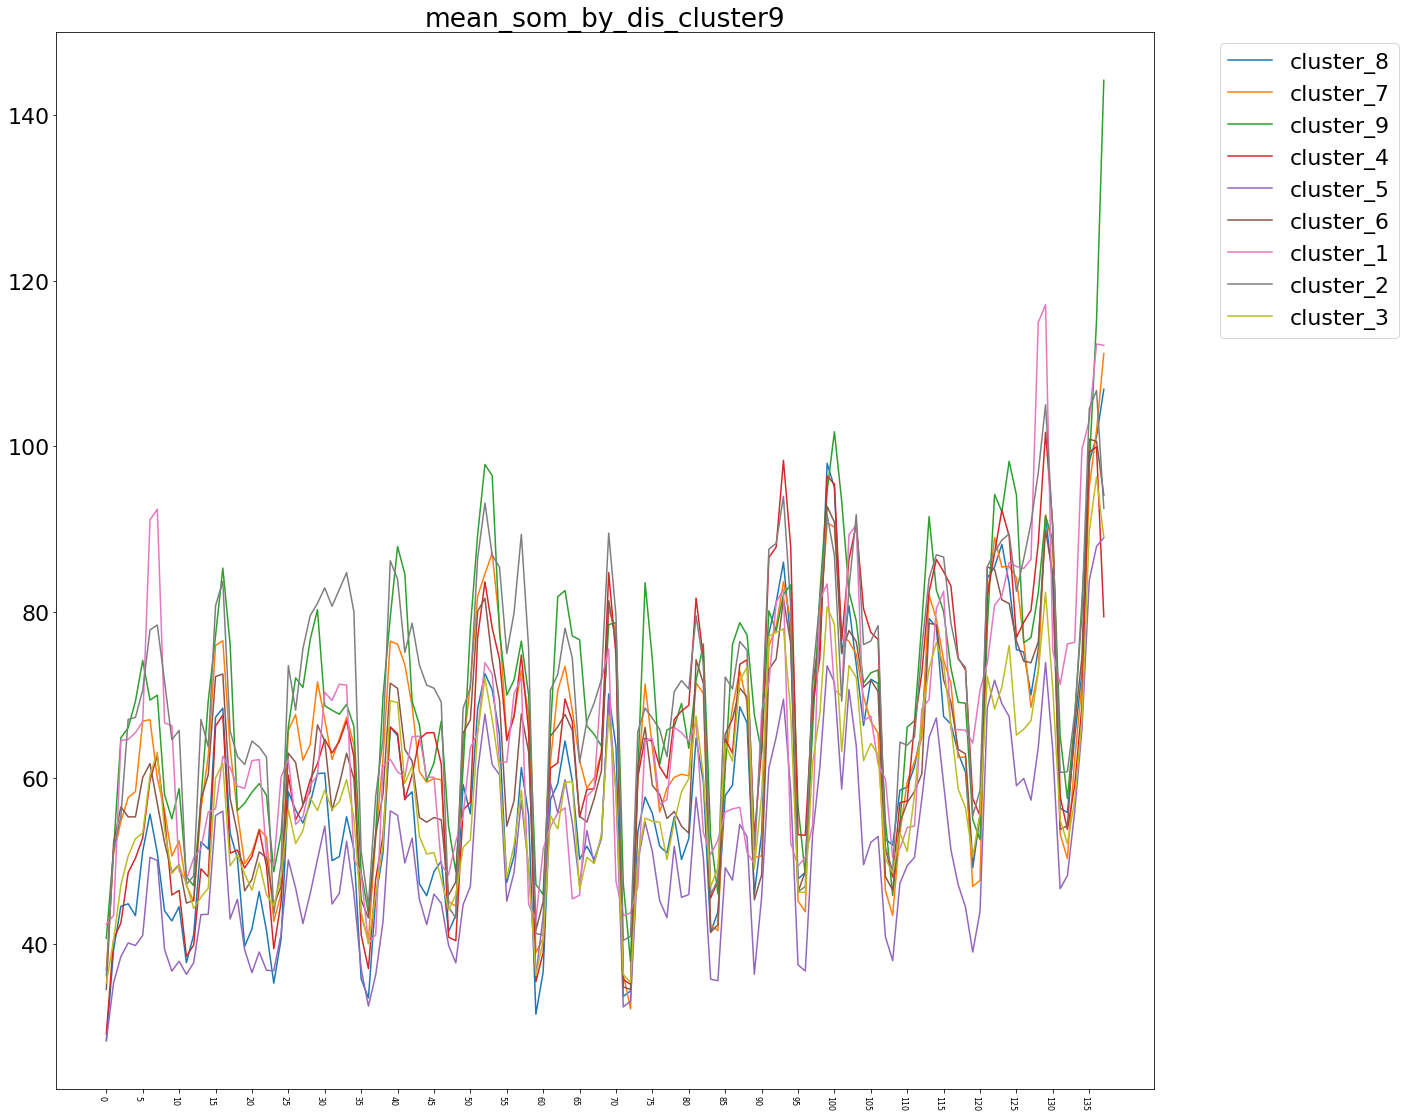

In [314]:
fig = plt.figure(figsize=(20,16))
for i in range(len(df_5km_dis.cluster_num.unique())):
    plt.plot(np.arange(0, 138, 1), df_5km_dis.groupby(['cluster_num']).mean().loc[:,"9601":"10706"].iloc[i,:].values, label=f'cluster_{int(df_5km_dis.cluster_num.unique()[i])}')

plt.xticks(fontsize=8)
plt.xticks(np.arange(0, 138+1, 5))
title = f'mean_som_by_dis_cluster{matrix_size**2}'
plt.title(title)
fig.autofmt_xdate(rotation=-90)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig(r'D:\JunShen\dataset\dataAfterProcess\somFeature\Jiulong(3)\line chart'+'\\'+title)

In [315]:
del df_5km_dis['cluster_num']

# 整理電號匯出

In [316]:
for i, v in enumerate(df_out):
    print(i, v, len(df_out[v]))
    # print(df_out[v])
    # break

0 5km_total_chara_cluster1 1490
1 5km_total_chara_cluster2 874
2 5km_total_chara_cluster3 368
3 5km_total_chara_cluster4 2292
4 5km_total_chara_cluster5 632
5 5km_total_chara_cluster6 392
6 5km_total_chara_cluster7 2442
7 5km_total_chara_cluster8 1151
8 5km_total_chara_cluster9 1378
9 5km_total_dir_cluster1 269
10 5km_total_dir_cluster2 410
11 5km_total_dir_cluster3 631
12 5km_total_dir_cluster4 421
13 5km_total_dir_cluster5 317
14 5km_total_dir_cluster6 698
15 5km_total_dir_cluster7 3667
16 5km_total_dir_cluster8 1453
17 5km_total_dir_cluster9 3153
18 5km_total_dis_cluster1 499
19 5km_total_dis_cluster2 1033
20 5km_total_dis_cluster3 6817
21 5km_total_dis_cluster4 435
22 5km_total_dis_cluster5 363
23 5km_total_dis_cluster6 671
24 5km_total_dis_cluster7 397
25 5km_total_dis_cluster8 472
26 5km_total_dis_cluster9 332


In [317]:
# Save
np.save(r'D:\JunShen\dataset\dataAfterProcess\somFeature\Jiulong(3)\som_ele_dict_4.npy', df_out)